In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv_path = r'D:\Projects\MSI2-ants\Results\Hypothesis1\Hypothesis1_AntColony2OptVsClassic_20250406174942.csv'
df = pd.read_csv(csv_path, sep=',')

# TestId = {TestName}_{Solver}_{TestData}

# add columns from column df['TestId']
df['Solver'] = df['TestId'].apply(lambda x: x.split('_')[-3])
df['TestData'] = df['TestId'].apply(lambda x: x.split('_')[-1])
df

,TestId,Date,Time,Cost,OptimalCost,CostDifference,RoutesCount,OptimalRoutesCount,AverageRouteUtilization,Solver,TestData
0,Hypothesis1_AntColony2OptVsClassic_AntColony_2...,2025-04-06T17:25:16Z,5951,31663,27591,14,27,26,92.54,AntColony,X-n101-k25
1,Hypothesis1_AntColony2OptVsClassic_AntColony2O...,2025-04-06T17:25:16Z,6893,31305,27591,13,27,26,92.54,AntColony2Opt,X-n101-k25
2,Hypothesis1_AntColony2OptVsClassic_AntColony_8...,2025-04-06T17:25:16Z,5421,30650,27591,11,27,26,92.54,AntColony,X-n101-k25
3,Hypothesis1_AntColony2OptVsClassic_AntColony2O...,2025-04-06T17:25:16Z,6917,30750,27591,11,26,26,96.10,AntColony2Opt,X-n101-k25
4,Hypothesis1_AntColony2OptVsClassic_AntColony_4...,2025-04-06T17:25:16Z,5767,31202,27591,13,27,26,92.54,AntColony,X-n101-k25
5,Hypothesis1_AntColony2OptVsClassic_AntColony2O...,2025-04-06T17:25:16Z,6875,30882,27591,11,27,26,92.54,AntColony2Opt,X-n101-k25
6,Hypothesis1_AntColony2OptVsClassic_AntColony_2...,2025-04-06T17:25:16Z,26383,50475,45607,10,55,53,91.38,AntColony,X-n172-k51
7,Hypothesis1_AntColony2OptVsClassic_AntColony2O...,2025-04-06T17:25:16Z,30501,49971,45607,9,53,53,94.83,AntColony2Opt,X-n172-k51
8,Hypothesis1_AntColony2OptVsClassic_AntColony_8...,2025-04-06T17:25:16Z,27536,50314,45607,10,53,53,94.83,AntColony,X-n172-k51
9,Hypothesis1_AntColony2OptVsClassic_AntColony2O...,2025-04-06T17:25:16Z,30472,49555,45607,8,54,53,93.08,AntColony2Opt,X-n172-k51


In [3]:
# group by TestData column and calculate mean of Cost, OptimalCost, RoutesCount, OptimalRoutesCount, AverageRouteUtilization and create new df
df_grouped = df.groupby(['TestData', 'Solver']).agg(
    Cost=('Cost', 'mean'),
    OptimalCost=('OptimalCost', 'mean'),
    RoutesCount=('RoutesCount', 'mean'),
    OptimalRoutesCount=('OptimalRoutesCount', 'mean'),
    AverageRouteUtilization=('AverageRouteUtilization', 'mean'),
).reset_index()

# add column with względna różnica kosztu (Cost - OptimalCost) / OptimalCost
df_grouped['RelativeCostDifference'] = (df_grouped['Cost'] - df_grouped['OptimalCost']) / df_grouped['OptimalCost']
df_grouped['RelativeCostDifference'] = df_grouped['RelativeCostDifference'].apply(lambda x: round(x, 2))

# add column with względna różnica liczby tras (RoutesCount - OptimalRoutesCount) / OptimalRoutesCount
df_grouped['RelativeRoutesCountDifference'] = (df_grouped['RoutesCount'] - df_grouped['OptimalRoutesCount']) / df_grouped['OptimalRoutesCount']
df_grouped['RelativeRoutesCountDifference'] = df_grouped['RelativeRoutesCountDifference'].apply(lambda x: round(x, 2))

df_grouped

,TestData,Solver,Cost,OptimalCost,RoutesCount,OptimalRoutesCount,AverageRouteUtilization,RelativeCostDifference,RelativeRoutesCountDifference
0,X-n101-k25,AntColony,31171.666667,27591.0,27.000000,26.0,92.540000,0.13,0.04
1,X-n101-k25,AntColony2Opt,30979.000000,27591.0,26.666667,26.0,93.726667,0.12,0.03
2,X-n172-k51,AntColony,50455.333333,45607.0,53.666667,53.0,93.680000,0.11,0.01
3,X-n172-k51,AntColony2Opt,49642.333333,45607.0,53.666667,53.0,93.663333,0.09,0.01
4,X-n214-k11,AntColony,13563.000000,10856.0,11.000000,11.0,99.730000,0.25,0.00
5,X-n214-k11,AntColony2Opt,12470.333333,10856.0,11.000000,11.0,99.730000,0.15,0.00


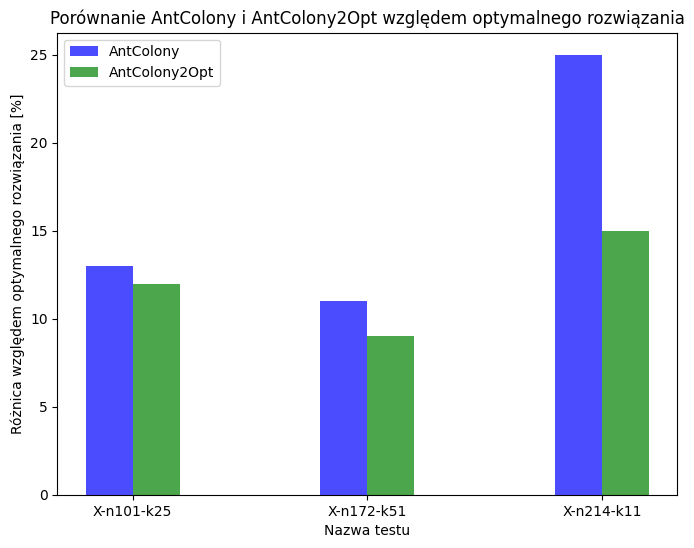

In [42]:
AntColony_relative_cost = df_grouped[df_grouped['Solver'] == 'AntColony']
AntColony_relative_cost = AntColony_relative_cost[['TestData', 'RelativeCostDifference']]
AntColony_relative_cost['RelativeCostDifference'] = AntColony_relative_cost['RelativeCostDifference'] * 100

AntColony2opt_relative_cost = df_grouped[df_grouped['Solver'] == 'AntColony2Opt']
AntColony2opt_relative_cost = AntColony2opt_relative_cost[['TestData', 'RelativeCostDifference']]
AntColony2opt_relative_cost['RelativeCostDifference'] = AntColony2opt_relative_cost['RelativeCostDifference'] * 100

# Define bar width
bar_width = 0.2

# Define positions for the bars
x = np.arange(len(AntColony_relative_cost['TestData']))

# Plot AntColony bars
plt.figure(figsize=(8, 6))
plt.bar(x - bar_width / 2, AntColony_relative_cost['RelativeCostDifference'], width=bar_width, color='blue', alpha=0.7, label='AntColony')

# Plot AntColony2Opt bars
plt.bar(x + bar_width / 2, AntColony2opt_relative_cost['RelativeCostDifference'], width=bar_width, color='green', alpha=0.7, label='AntColony2Opt')

# Add legend
plt.legend()

# Add title and labels
plt.xlabel('Nazwa testu')
plt.ylabel('Różnica względem optymalnego rozwiązania [%]')
plt.title('Porównanie AntColony i AntColony2Opt względem optymalnego rozwiązania')
plt.xticks(x, AntColony_relative_cost['TestData'])

# Show plot
plt.show()

In [20]:
df2

,TestData,Solver,Cost
0,X-n101-k25,AntColony,31171.666667
1,X-n101-k25,AntColony2Opt,30979.000000
2,X-n172-k51,AntColony,50455.333333
3,X-n172-k51,AntColony2Opt,49642.333333
4,X-n214-k11,AntColony,13563.000000
5,X-n214-k11,AntColony2Opt,12470.333333


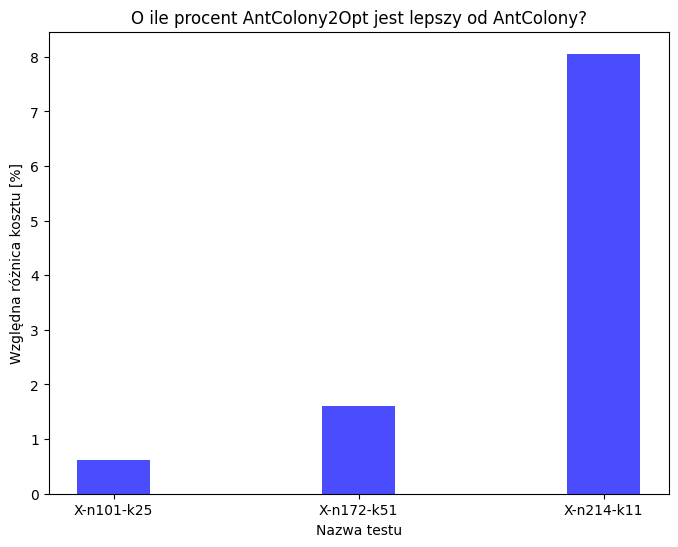

In [45]:
# compare AntColony and AntColony2Opt for each test data (get relative cost difference for each test data)

# get columns TestData, Solver, Cost
df2 = df_grouped[['TestData', 'Solver', 'Cost']]
df2

# calculate relative cost difference for each test data

df_final = pd.DataFrame(columns=['TestData', 'AntColony', 'AntColony2Opt'])
df_final['TestData'] = df2['TestData'].unique()
df_final['AntColony'] = df2[df2['Solver'] == 'AntColony']['Cost'].values
df_final['AntColony2Opt'] = df2[df2['Solver'] == 'AntColony2Opt']['Cost'].values

df_final['CostDifference'] = df_final['AntColony'] - df_final['AntColony2Opt']
df_final['CostDifference'] = df_final['CostDifference'].apply(lambda x: round(x, 2) * 100)
df_final['RelativeCostDifference'] = df_final['CostDifference'] / df_final['AntColony']
df_final

# plot to histogram
plt.figure(figsize=(8, 6))
plt.bar(df_final['TestData'], df_final['RelativeCostDifference'], color='blue', alpha=0.7, width=0.3)
plt.xlabel('Nazwa testu')
plt.ylabel('Względna różnica kosztu [%]')
plt.title('O ile procent AntColony2Opt jest lepszy od AntColony?')
plt.show()
